# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
train_ds = pd.read_csv('sentiment_train' , delimiter="\t")
train_ds.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [3]:
pd.set_option('max_colwidth',800)
train_ds[train_ds['sentiment']==1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


# Exploring data

In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
sentiment    6918 non-null int64
text         6918 non-null object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


# Count plot for sentiments

In [5]:
train_ds['sentiment'].value_counts()

1    3943
0    2975
Name: sentiment, dtype: int64

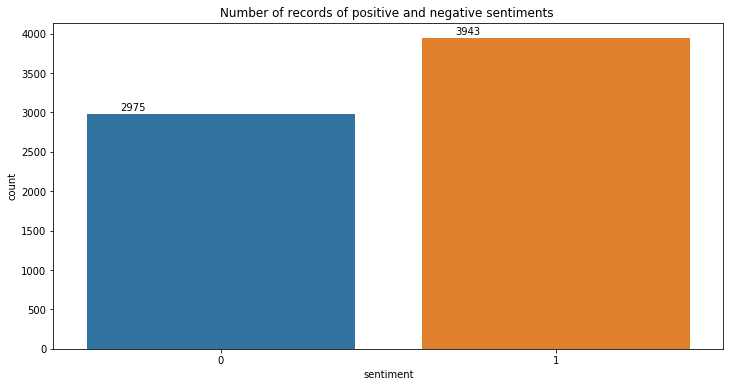

In [6]:
plt.figure(figsize=(12,6))
x = sns.countplot(x = 'sentiment', data=train_ds);
plt.title('Number of records of positive and negative sentiments ')

# Annotate

for i in x.patches:
    x.annotate(i.get_height() , (i.get_x() + 0.1 , i.get_height() + 50))

# Pre-processing - using BoW model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
count_vectoriser = CountVectorizer()

In [9]:
feature_vector = count_vectoriser.fit(train_ds['text'])  # Creating dictionary from corpus

In [10]:
feature = feature_vector.get_feature_names()  # Retrieve feature names
print('Total number of features : {}'.format(len(feature)))

Total number of features : 2132


In [11]:
# Converting text data into vector form
train_ds_features = count_vectoriser.transform(train_ds['text'])

In [12]:
# dimensions of transformed vectors

train_ds_features.shape

(6918, 2132)

In [13]:
train_ds_features

<6918x2132 sparse matrix of type '<class 'numpy.int64'>'
	with 65398 stored elements in Compressed Sparse Row format>

In [14]:
# Number of non-zero values in the matrix.

print('Total number of non - zero values in matrix are : {}'.format(train_ds_features.getnnz()))

Total number of non - zero values in matrix are : 65398


In [15]:
# Ratio of zero and non zero values

Total_number_of_words = train_ds_features.shape[0] * train_ds_features.shape[1]
Total_number_of_zeros = train_ds_features.getnnz()
print('Ratio of zero values in total words is : {}'.format(Total_number_of_zeros * 100 / Total_number_of_words))

Ratio of zero values in total words is : 0.4434010415225908


In [16]:
# Displaying document vectors

train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = feature

In [17]:
train_ds_df.iloc[0:5 , 150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


# Total number of occurences of feature columns

In [18]:
feature_counts = np.sum(train_ds_features.toarray() , axis=0)

In [19]:
feature_counts_df = pd.DataFrame({'features':feature , 'counts':feature_counts})
feature_counts_df

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1
...,...,...
2127,yuck,1
2128,yuh,1
2129,zach,1
2130,zen,80


Text(0, 0.5, 'Density')

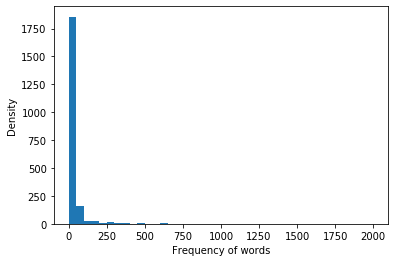

In [20]:
plt.hist(feature_counts_df.counts , bins=40 , range=(0,2000));
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [21]:
# Number of words that occured rarely

len(feature_counts_df[feature_counts_df['counts']==1])

1228

In [22]:
# Repeating process again

count_vectorizer = CountVectorizer(max_features=1000)  # Initializing count vectoriser
feature_vector = count_vectorizer.fit(train_ds['text'])  # fitting the data again
features = feature_vector.get_feature_names()  # Extracting feature names
train_ds_features = count_vectorizer.transform(train_ds['text'])  # Transforming the text to matrix of vectors

In [23]:
# Count frequency of words

feature_counts = np.sum(train_ds_features.toarray(),axis=0)  # Extract the count of number of occurences
feature_counts_df = pd.DataFrame({'features':features , 'counts':feature_counts}) # Converting the count into dataframe
feature_counts_df.sort_values('counts' , ascending=False).head(15) # sort the dataframe in descending order and display top 15 values

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


# Removing stop words

In [24]:
from sklearn.feature_extraction import text

In [25]:
stop_words = text.ENGLISH_STOP_WORDS

In [26]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','potter','code','vinci','da','mountain','movie','movies'])

In [27]:
# Repeating process again

count_vectorizer = CountVectorizer(max_features=1000 , stop_words=my_stop_words)  # Initializing count vectoriser
feature_vector = count_vectorizer.fit(train_ds['text'])  # fitting the data again
features = feature_vector.get_feature_names()  # Extracting feature names
train_ds_features = count_vectorizer.transform(train_ds['text'])  # Transforming the text to matrix of vectors

In [28]:
# Count frequency of words

feature_counts = np.sum(train_ds_features.toarray(),axis=0)  # Extract the count of number of occurences
feature_counts_df = pd.DataFrame({'features':features , 'counts':feature_counts}) # Converting the count into dataframe
feature_counts_df.sort_values('counts' , ascending=False).head(15) # sort the dataframe in descending order and display top 15 values

,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


# Stemming

In [29]:
from nltk.stem.snowball import PorterStemmer

In [30]:
stemmer = PorterStemmer()

In [31]:
analyzer = CountVectorizer().build_analyzer()

In [65]:
analyzer

functools.partial(<function _analyze at 0x7fc99cb41400>, ngrams=<bound method _VectorizerMixin._word_ngrams of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>, tokenizer=<built-in method findall of _sre.SRE_Pattern object at 0x7fc991582418>, preprocessor=functools.partial(<function _preprocess at 0x7fc99cb412f0>, accent_function=None, lower=True), decoder=<bound method _VectorizerMixin.decode of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
          

In [34]:
def stemming(doc):
    stem_words = [stemmer.stem(i) for i in analyzer(doc)] # Stemming of words
    non_stop_words = [i for i in stem_words if i not in my_stop_words] # Removing stop words from list that is already created.
    return non_stop_words

In [35]:
# Repeating process again

count_vectorizer = CountVectorizer(analyzer=stemming,max_features=1000)  # Initializing count vectoriser
feature_vector = count_vectorizer.fit(train_ds['text'])  # fitting the data again
features = feature_vector.get_feature_names()  # Extracting feature names
train_ds_features = count_vectorizer.transform(train_ds['text'])  # Transforming the text to matrix of vectors

In [36]:
# Count frequency of words

feature_counts = np.sum(train_ds_features.toarray(),axis=0)  # Extract the count of number of occurences
feature_counts_df = pd.DataFrame({'features':features , 'counts':feature_counts}) # Converting the count into dataframe
feature_counts_df.sort_values('counts' , ascending=False).head(15) # sort the dataframe in descending order and display top 15 values

,features,counts
303,harri,2093
83,brokeback,2000
414,love,1883
791,suck,1484
922,wa,1176
400,like,1155
447,movi,1149
45,awesom,1130
441,mission,1094
351,imposs,1093


# Plotting distribution of words across different sentiment

In [39]:
df = pd.DataFrame(train_ds_features.todense())

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df.columns = features

In [42]:
df.head()

,10,17,33,6th,aaron,abl,absolut,absurd,academi,accept,...,yeah,year,yesterday,yip,young,younger,yuck,yuh,zach,zen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df['sentiment'] = train_ds['sentiment']
df.head()

,10,17,33,6th,aaron,abl,absolut,absurd,academi,accept,...,year,yesterday,yip,young,younger,yuck,yuh,zach,zen,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


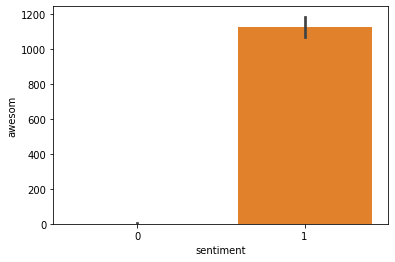

In [44]:
sns.barplot(x = 'sentiment' , y = 'awesom' , data = df , estimator=sum)

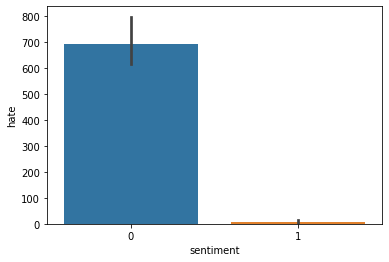

In [45]:
sns.barplot(x = 'sentiment' , y = 'hate' , data = df , estimator=sum)

# Splitting the data

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
# Splitting the data so that 70% will be used for training the model and 30% for testing the model.

X_train, X_test, y_train, y_test = train_test_split(train_ds_features, train_ds['sentiment'], test_size=0.3, random_state=42)

In [51]:
X_train.shape

(4842, 1000)

# Model - Naive Bayes

In [52]:
from sklearn.naive_bayes import BernoulliNB

In [53]:
NB_clf = BernoulliNB()

In [54]:
NB_clf.fit(X_train.toarray() , y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [55]:
# Predictions
preditions_NB = NB_clf.predict(X_test.toarray())

In [56]:
# Accuracy

from sklearn import metrics

print(metrics.classification_report(y_test , preditions_NB))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



Text(0.5, 1, 'Confusion matrix - Naive Bayes')

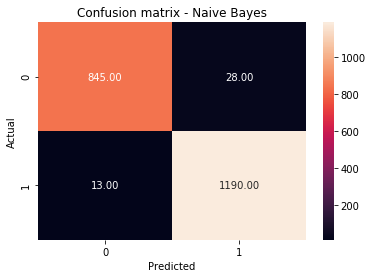

In [58]:
# Confusion matrix

cm = metrics.confusion_matrix(y_test , preditions_NB)
sns.heatmap(cm , annot=True , fmt='.2f');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix - Naive Bayes')

# Model - Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rnd_clf = RandomForestClassifier()

In [62]:
rnd_clf.fit(X_train.toarray() , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
pred_rnd_clf = rnd_clf.predict(X_test.toarray())

In [64]:
print(metrics.classification_report(y_test , pred_rnd_clf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       873
           1       0.99      0.99      0.99      1203

    accuracy                           0.99      2076
   macro avg       0.99      0.99      0.99      2076
weighted avg       0.99      0.99      0.99      2076

